Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Clai101"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
def getSphereVolumeExact(D, R = 1.0):
    return np.pi**(D/2) * R ** D / sp.gamma(1 + D / 2)

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

R = 3, D = 3, V = 113.09733552923255 = 4/3 * pi * R^3 = 113.09733552923254
R = 3, D = 2, V = 28.274333882308138 = pi * R^2 = 28.274333882308138
R = 3, D = 4, V = 399.718978244119 = pi / 2 * R^4 = 399.718978244119


Text(0, 0.5, 'V')

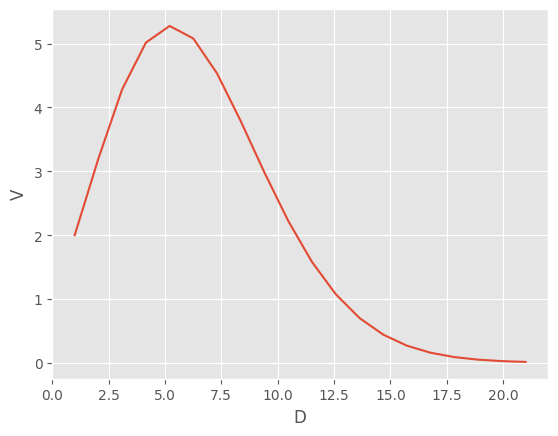

In [14]:
print(f"R = 3, D = 3, V = {getSphereVolumeExact(3, R = 3)} = 4/3 * pi * R^3 = {4/3 * np.pi * 3**3}")
print(f"R = 3, D = 2, V = {getSphereVolumeExact(2, R = 3)} = pi * R^2 = {np.pi * 3 ** 2}" )
print(f"R = 3, D = 4, V = {getSphereVolumeExact(4, R = 3)} = pi / 2 * R^4 = {np.pi**2 / 2 * 3 ** 4}")
plt.plot(np.linspace(1, 21, 20), getSphereVolumeExact(np.linspace(1, 21, 20)))
plt.xlabel("D")
plt.ylabel("V")

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [49]:
def getSphereVolumePseudorandom(N, D, R = 1):
    v = (2 * R) ** D 
    k = np.random.uniform(low=-R, high=R, size=(N,D)) 
    in_ = 0
    for i in range(N):
        if np.linalg.norm(k[i,:]) <= R: 
            in_ += 1
    v = v * in_ / N
    return v
print(f"R = 3, D = 3, V = {getSphereVolumePseudorandom(100000, 3, R = 3)} = 4/3 * pi * R^3 = {4/3 * np.pi * 3**3}")
print(f"R = 3, D = 2, V = {getSphereVolumePseudorandom(100000, 2, R = 3)} = pi * R^2 = {np.pi * 3 ** 2}" )
print(f"R = 3, D = 4, V = {getSphereVolumePseudorandom(100000, 4, R = 3)} = pi / 2 * R^4 = {np.pi**2 / 2 * 3 ** 4}")

R = 3, D = 3, V = 113.23368 = 4/3 * pi * R^3 = 113.09733552923254
R = 3, D = 2, V = 28.29744 = pi * R^2 = 28.274333882308138
R = 3, D = 4, V = 400.23072 = pi / 2 * R^4 = 399.718978244119


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

Text(0, 0.5, '$\\epsilon$')

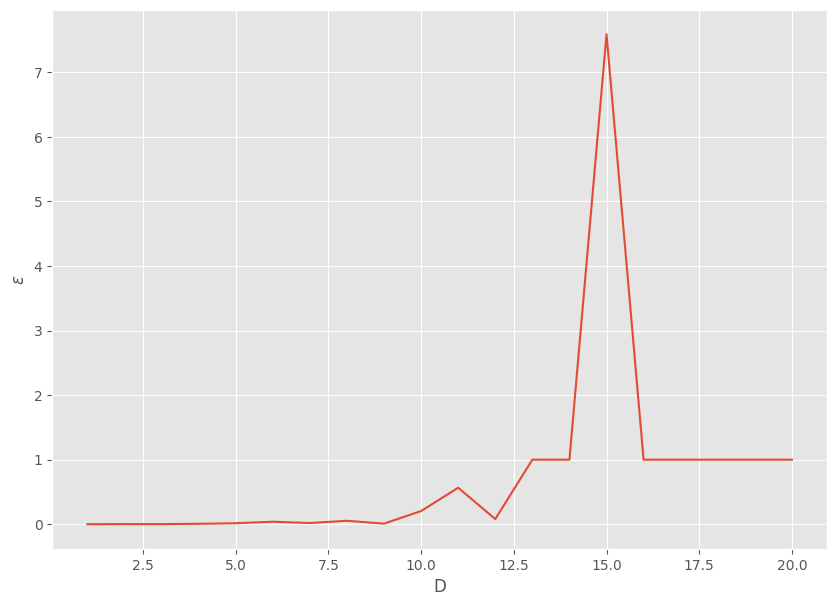

In [56]:
N = 10000
D = np.linspace(1, 20, 20, dtype=int)
eps = []
for i in range(1, 21):
    eps.append(abs(getSphereVolumeExact(i) - getSphereVolumePseudorandom(N, i)) / getSphereVolumeExact(i))
    
plt.figure(figsize = (10, 7))
plt.plot(D, eps, '-')

plt.xlabel('D')
plt.ylabel('$\epsilon$')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [ ]:
#!pip install sobol_seq <-- uncomment to install sobol_seq
import sobol_seq
# YOUR CODE HERE
raise NotImplementedError()

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [53]:
sobol_seq.i4_sobol_generate?

Object `sobol_seq.i4_sobol_generate` not found.


In [ ]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

YOUR ANSWER HERE

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [ ]:
def getSample(N):
    """
    Функция возвращает выборку случайных величин с распределнием ~sqrt(1-x^2) 

    --------
    Аргументы:
    N - int, количество случайных точек
    --------
    Функция возвращает:
    sample - numpy ndarray of float, массив случайных величин размера N
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [ ]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [ ]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [ ]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [ ]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [ ]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [ ]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

In [ ]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

YOUR ANSWER HERE

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [ ]:
N = 64
state = getInitialState(N)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state)
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE